Would we approach this as a supervised or unsupervised learning task and why? **I would approach this problem as a unsupervised learning task as we are given an unlabeled dataset.**


# Step 1

In [2]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
data_df = pd.read_csv(filepath_or_buffer='data_h3_3337.csv')
data_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("Number of Observations:",len(data_df))

Number of Observations: 200


In [5]:
print(data_df.isna().sum())
data_df.drop_duplicates(inplace=True)
print("There are no missing values.")

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
There are no missing values.


In [6]:
print("List of columns and how many unique values each has")
for column in data_df.columns:
    print(column,"-", data_df[column].nunique())

List of columns and how many unique values each has
CustomerID - 200
Gender - 2
Age - 51
Annual Income (k$) - 64
Spending Score (1-100) - 84


# Step 2

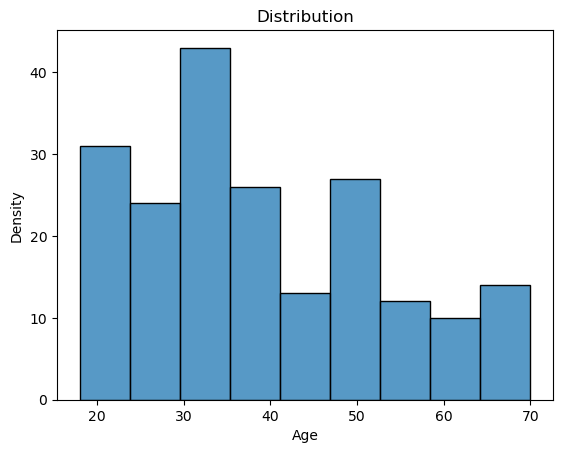

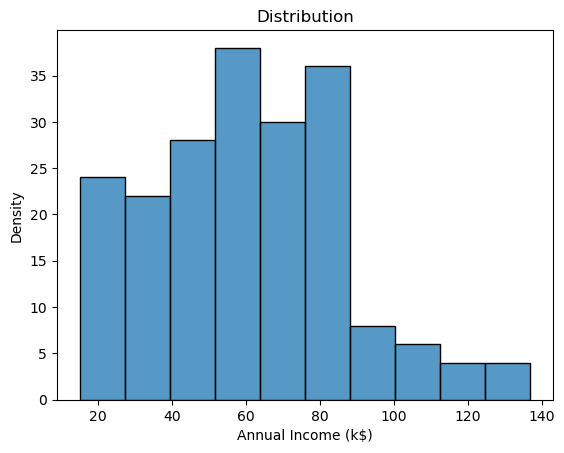

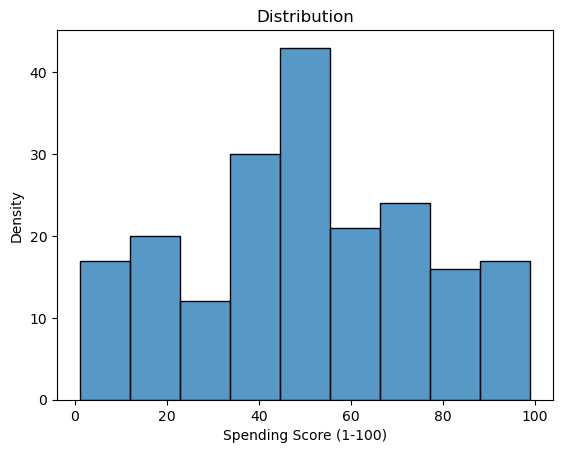

In [7]:
columns_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for column in columns_to_plot:
    sns.histplot(x=data_df[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title('Distribution')

    plt.show()

**From the Age histogram plot, we can see that a majority of observations will be in the early years of their lives, age 20-40.**

**From the annual income histogram plot, we see that a majority of observations land in the low to middle end of annual income range. The histogram is also skewed to the right.**

**From the spending score histogram plot, we see an pretty even distribution except for the two bars, one between 20 and 40, and the other between 40 and 60.**




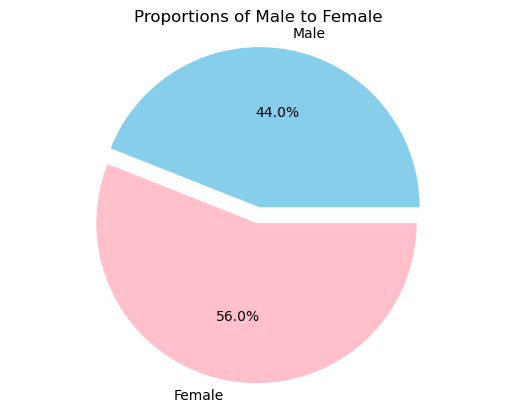

In [8]:
male_count = (data_df['Gender'] == 'Male').sum()
female_count = (data_df['Gender'] == 'Female').sum()
gender_counts = {'Male': male_count, 'Female': female_count}

labels = gender_counts.keys()
sizes = gender_counts.values()
explode = (0, 0.1)
colors = ['skyblue', 'pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
ax1.axis('equal')

plt.title('Proportions of Male to Female')
plt.show()


**From the pie chart, we can conclude that there are more observations that are female taking up 56% of all observations while male only takes up 44%.**

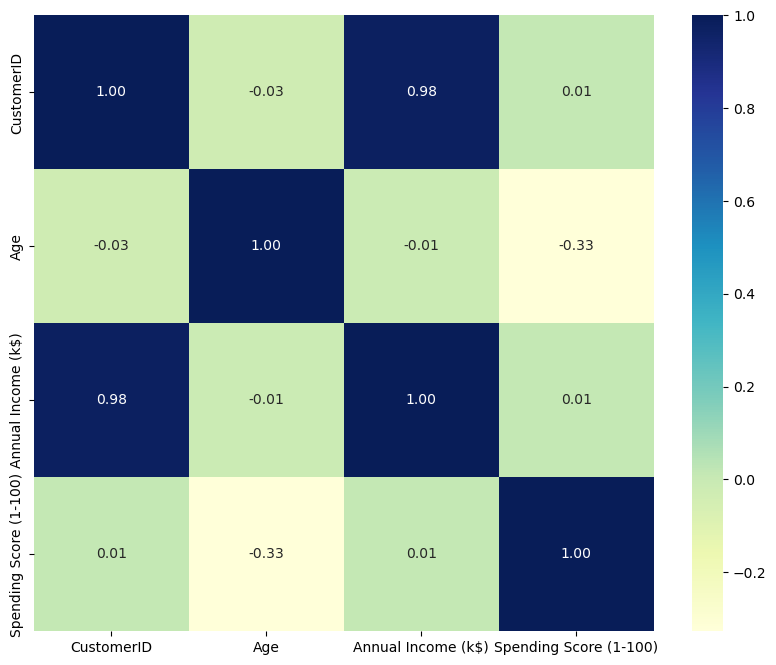

In [9]:
correlation_matrix = data_df.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

**We see that there is multicollinearity as the columns CustomerID and Annual Income have a correlation coefficient of .98, meaning that those two columns are highly correlated.**

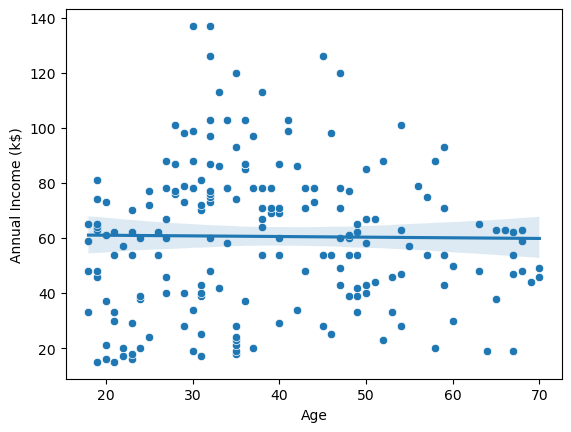

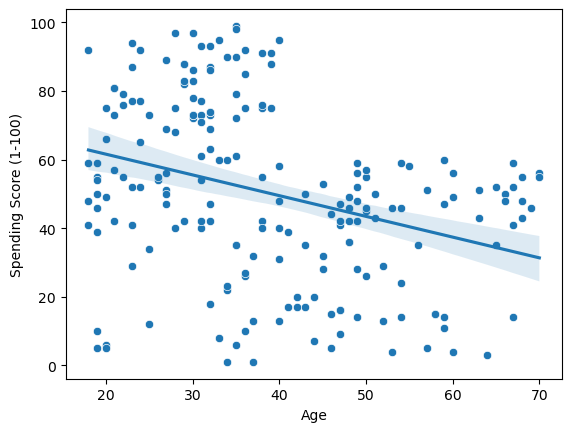

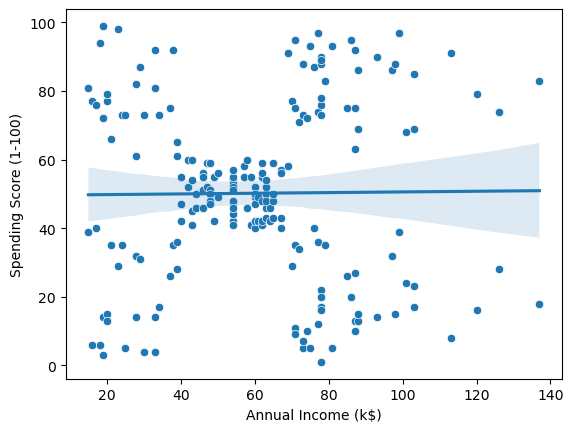

In [10]:
columns_to_scatter_plot = [['Age', 'Annual Income (k$)'], ['Age', 'Spending Score (1-100)'], ['Annual Income (k$)', 'Spending Score (1-100)']]

for columns in columns_to_scatter_plot:
    sns.scatterplot(data=data_df, x=data_df[columns[0]], y=data_df[columns[1]])
    sns.regplot(data=data_df, x=columns[0], y=columns[1], scatter=False)
    plt.show()


**From the graph Age v. Annual Income and Annual Income v. Spending Score, we see that there is no correlation between the two columns of each respective graph. From the Age v. Spending Score, we can see there is a negative correlation meaning as Age increases, spending score will decrease.**

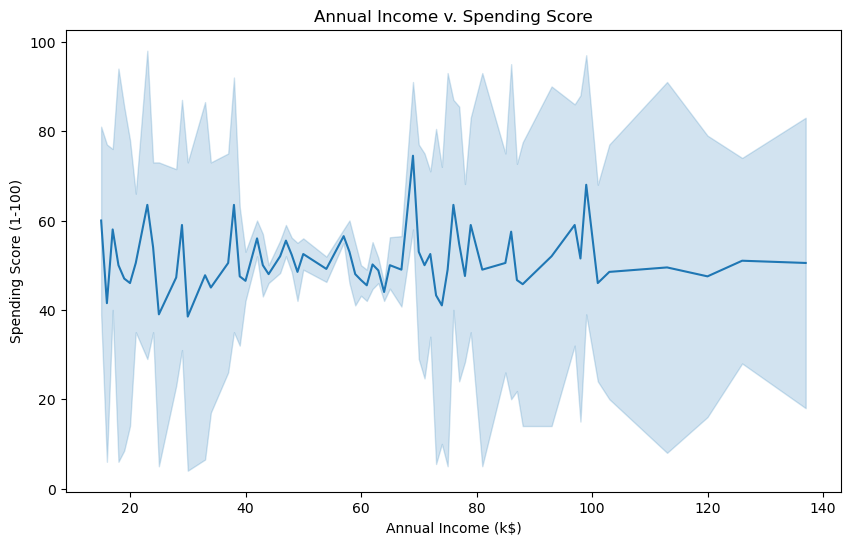

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title(f'Annual Income v. Spending Score')
plt.show()

**From the line graph, we can see the as annual income increases, the change in spending score varies as it increases or decreases at different points. We can conclude that there might not be a correlation or at least a strong one between the two columns as there is no overall trend.**

# Step 3

In [12]:
data_df[['scaled_income', 'scaled_spending']] =  StandardScaler().fit_transform(data_df[['Annual Income (k$)', 'Spending Score (1-100)']])

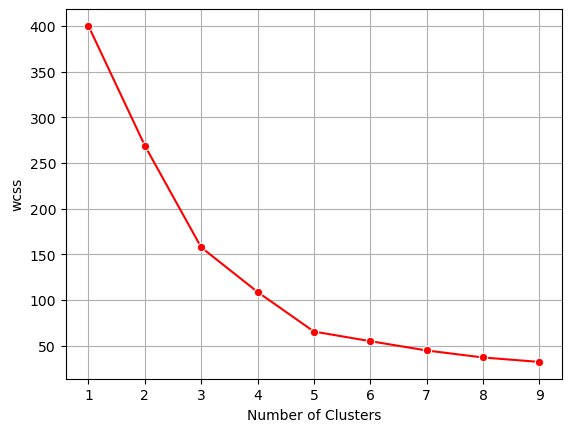

In [13]:
warnings.filterwarnings("ignore")

def find_optimal_number_of_clusters(data, max_k):
    wcss = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        wcss.append(kmeans.inertia_)
    
    sns.lineplot(x=range(1, max_k), y=wcss,marker='o',color='red')
    plt.xlabel('Number of Clusters')
    plt.ylabel('wcss')
    plt.grid(True)
    plt.show()

find_optimal_number_of_clusters(data_df[['scaled_income', 'scaled_spending']], 10)

**Based on the elbow plot, we see that the optimal number of clusters is 5.**

In [14]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_df[['scaled_income', 'scaled_spending']])
data_df['kmeans'] = kmeans.labels_

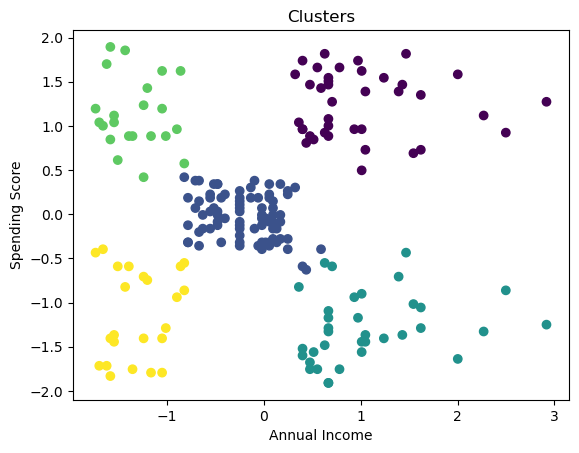

In [15]:
plt.scatter(x=data_df['scaled_income'], y =data_df['scaled_spending'], c = data_df['kmeans'])
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Step 4

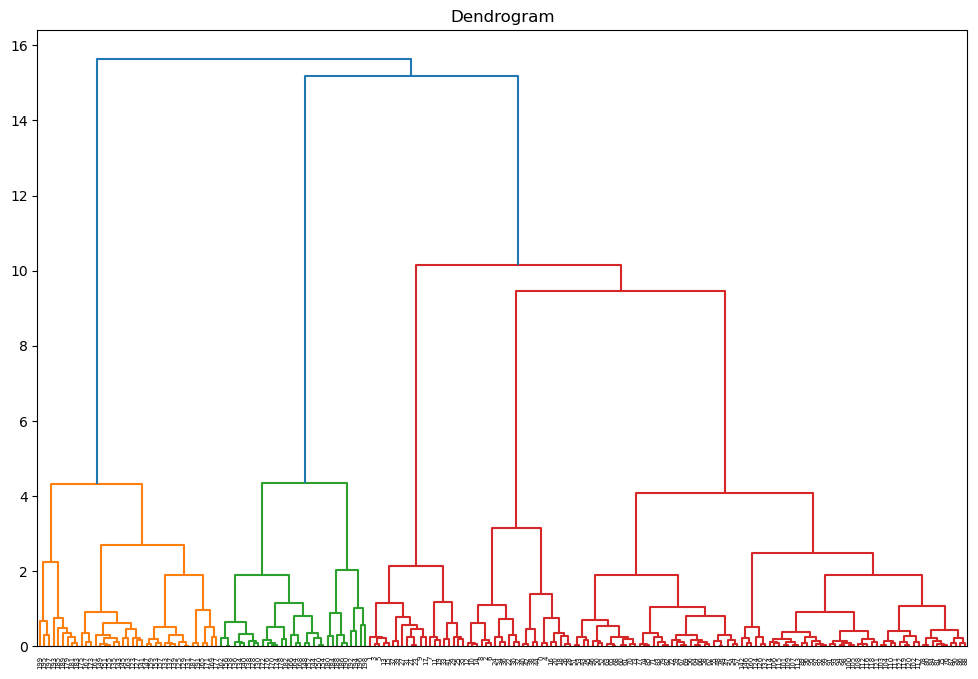

In [16]:
dendrogram_plot = linkage(data_df[['scaled_income', 'scaled_spending']], method='ward')
plt.figure(figsize=(12, 8))
dendrogram(dendrogram_plot)
plt.title('Dendrogram')
plt.show()

**Based on the dendogram, the optimal number of clusters is 3.**

# Step 5

**Based on my results, both K-Means and Hierarchical clustering achieved different results starting with what number of clusters was deemed optimal. K-Means found that the optimal number of clusters was 5, while Hierarchical found that 3 was the optimal number of clusters.**


**K-means aims to group observations of a dataset into k partitions where in each partition, each observation is similar to the other observations in the same partition. Some advantages are easy implementation and works well with larger datasets. While Hierarchical clustering is building hierarchies of clusters either bottom-up or top-down. An advantage of this method is not needing to know the optimal number of clusters but it is computationally more expensive and senstive to noise.**

**An example of where someone could use k-means clustering is tailoring advertisements or items on a shopping service to customers. By grouping customers based on purchasing or search history, services can target customers with advertisements and suggested items much better.**